Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#math tools
import numpy as np
import pandas as pd
import scipy.constants as co
import ENDF6el as endfel

Recoil Energy Distributions for Neutron-Nucleus Scattering
==========================================================

In the previous notebook `A-Differential-Neutron-Nucleus-XN.ipynb` we found out how our libraries can extract the Center-of-Mass (CoM) _angular_ differential cross sections for neutron scattering on nuclei. Our detectors measure, however, deposited energy. So we need to transform the angular variable in the CoM (say $cos(\theta_{cm})$) to the energy deposited into the detector. 

Energy Relationship
-------------------

The relationship between the deposited energy $E_r$ and the CoM scattering angle $\theta_{cm}$ is as follows.

\begin{equation}
E_r = \frac{2m_n M E_n}{(m_n + M)^2}\left(1-\cos{\theta_{cm}}\right),
\end{equation}

$E_r$ is the recoil energy of the nucleus, $E_n$ is the energy of the incident neutron, $m_n$ is the mass of the neutron, and $M$ is the mass of the nucleus.

Notebook A gave us the `fetch_diff_xn()` function which provided the differential cross section, $\frac{d\sigma}{d\Omega}(cos\theta_{cm})$ (Taylor, Chapter 14), and tells us the probability of a neutron-nucleus scattering angle in the CoM frame.

Differential Cross Section Data
-

In [2]:
#function for angular scattering probabilties of neutrons for 1.o MeV
dsdomeg = endfel.fetch_diff_xn(En=1.0e6)
#make the dsdomeg function work for array of values
dsdomegv = np.vectorize(dsdomeg)

Encode Recoil Energy Equation
-

In [3]:
# import custom Python module containing atomic mass values
import masses as ms

# make a list of 100 evenly spaced values for cos(theta)
ct = np.linspace(-1.0, 1.0, 100)

# define Silicon-28  mass
m28si = ms.getMass(14,28)

# define the first factor of the Energy Relationship Equation (E_r / E_n)
fac = ms.m_n * m28si / (ms.m_n + m28si)**2

# define the total value of (E_r / E_n)
escale = 2 * fac * (1 - ct)

# define list of recoil values for 1.0 MeV
er_vals = 1.0 * escale

Convert Angular Probability Distribution to Recoil Energy Probability Distribution
-
Whereas we previously worked with cross section vs. angle, we now are working with cross section vs. energy. Thus, we must convert $\frac{d\sigma}{d\Omega}$ into $\frac{d\sigma}{dE_r}$.

Our function `dsdomegv(ct)` gives us $\frac{d\sigma}{d\Omega}$ for any value of $cos(\theta)$. Now, we need to develop a function that does the same for the recoil energy.

The above code generates recoil energies corresponding to each angle. The Jacobian function changes our variable from scattering angle to recoil energy.

In [4]:
# incident neutron energy in MeV
E_n = 1.0

# compute Jacobian multiplier to convert dσ/dΩ → dσ/dE_r
jac = (1 / (2 * fac)) * 2 * np.pi

# use Jacobian to rescale dσ/dΩ into dσ/dE_r
dsig_dEr = (jac / E_n) * dsdomegv(ct)

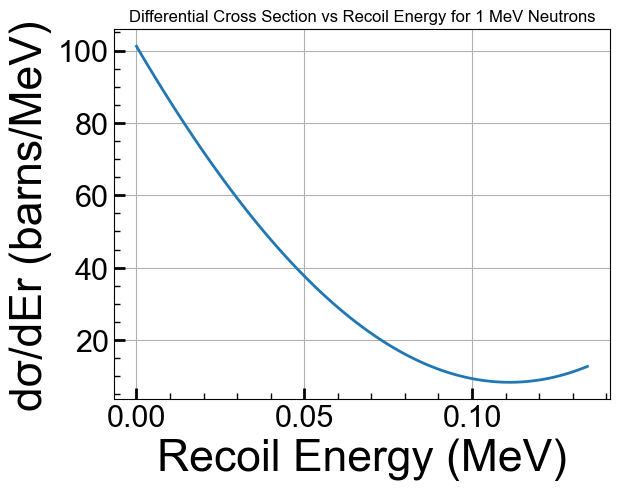

In [5]:
# plot differential cross section vs recoil energy
plt.plot(er_vals, dsig_dEr)
plt.xlabel('Recoil Energy (MeV)')
plt.ylabel('dσ/dEr (barns/MeV)')
plt.title('Differential Cross Section vs Recoil Energy for 1 MeV Neutrons')
plt.grid(True)
plt.show()

Mass Libraries
--------------
Mass of neutron $m_n$ (from [[NIST - Neutron][NIST - Neutron]]) ≈ 1.00866491606 u<br />
Mass of $^{28}$Si (from [[NIST - Silicon][NIST - Silicon]]) ≈ 27.97692653465  u

[NIST - Silicon]: https://physics.nist.gov/cgi-bin/Compositions/stand_alone.pl?ele=Si "NIST - Silicon Documentaion"
[NIST - Neutron]: https://physics.nist.gov/cgi-bin/cuu/Value?mnu "NIST - Neutron Documentation"